## Visualization
Start with the basics
- Quantitives
- Aestetics

# Pandas and visualization
How to visualize data organized as pandas DataFrame?
1. Pandas has Matlab-lookalike plotting package based on matplotlib
  * (+) High quality rendering, 
  * (-) 90'era scientific look and feel as default, limited types of plots

2. plotly / seaborn
  * (+) Rich in possibilities, less stiff and mature
  * (-) Adjusments can be complicated
3. plotnine - A Grammar of Graphics for Python
  * (+) Rules for forming plots - "grammar", less stiff and more modern look and feel
  * (-) Not fully matured 

4. Do it manually (on paper or a drawing program (computer)).
    * (+) Only limited by you drawing abilities
    * (-) Too many possibilities may make us *too* creative
    
Using plotting tools for publication quality products often requires time-consuming hand-tweaking.

And remember: we should not go for "Isn't it remarkable that the computer can be programmed to draw like that?" but "My, what interesting data." (Tufte, 1983)

## [Seaborn](https://seaborn.pydata.org/)
* Build on top of Matplotlib - high level interface.
* More appealing aestics
* Less manual adjustments compared to Matplotlib
  * But adjustments are still with Matplotlib - Google is your friend

In [1]:
import seaborn as sns

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Text(0, 0.5, 'Price')

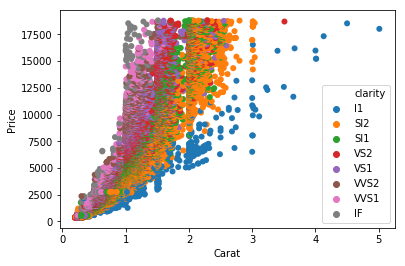

In [79]:
# Load the example iris dataset
diamonds = sns.load_dataset("diamonds")

clarity_ranking = ["I1", "SI2", "SI1", "VS2", "VS1", "VVS2", "VVS1", "IF"]
ax = sns.scatterplot(x="carat", y="price",
                hue="clarity",
                #style='clarity', #redundant encoding
                hue_order=clarity_ranking,
                linewidth=0, # remove white edge
                data=diamonds)
#ax.set(xlabel='Carat', ylabel='Price')
plt.xlabel('Carat')
plt.ylabel('Price')

In [46]:
manual_colors = {'red', 'green', 'blue', 'yellow', 'black', 'cyan', 'orange', 'brown'}

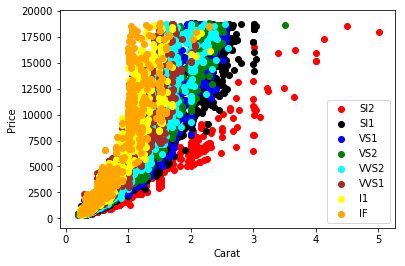

In [49]:
# with scatterplot
ax = plt.subplot()
for clarity, color in zip(clarity_ranking, manual_colors):
    I = diamonds['clarity'] == clarity
    ax.scatter(x=diamonds['carat'][I], y=diamonds['price'][I], c=(color,))

plt.xlabel('Carat')
plt.ylabel('Price')
plt.legend(mapping.keys())

* What do we like/dislike?
  * Ugly?
  * Bad?
  * Wrong?
* Entering an iterative process

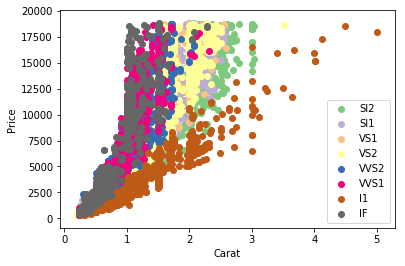

In [43]:
accent = plt.get_cmap('Accent').colors
ax = plt.subplot()
for i, m in enumerate(manual_colors):
    I = diamonds['clarity'] == m
    ax.scatter(x=diamonds['carat'][I], y=diamonds['price'][I], c=(accent[i],))

plt.xlabel('Carat')
plt.ylabel('Price')
plt.legend(mapping.keys())

AttributeError: 'PathCollection' object has no attribute 'legend_elements'

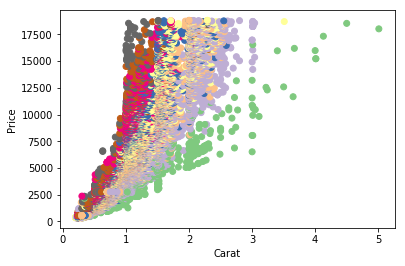

In [77]:
fig, ax = plt.subplots()
cc = dict(zip(clarity_ranking, range(len(clarity_ranking))))
scatter = ax.scatter(x=diamonds['carat'], y=diamonds['price'], c=diamonds['clarity'].map(cc) , cmap='Accent')

plt.xlabel('Carat')
plt.ylabel('Price')
plt.legend(*scatter.legend_elements(), loc="lower right", title="Clarity")

/home/tlj/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


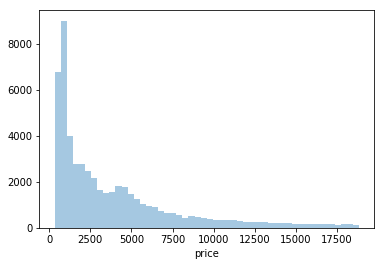

In [4]:
# histogram/density and kernel density estimate
sns.distplot(diamonds['price'], kde=False)

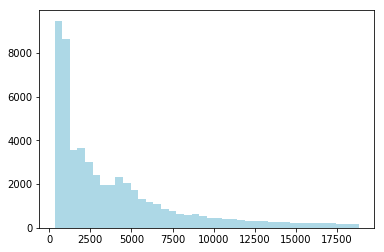

In [58]:
bins = plt.hist(diamonds['price'], bins=40, color='lightblue')

## Working with data from Danmarks Statistik
- Education - parents/children relation
- Pre-proccesed, ../data_examples/education.ipynb
  * Getting data from DST API
  * Selecting year=2018
  * Only selecting cumulated values (in total, and not per age)

In [59]:
import requests
url = 'https://api.statbank.dk/v1/tableinfo'
params = {"lang": "en", "table": "STATUS46", "format": "JSON"}
resp = requests.post(url, data=params)
j = resp.json()

dataparams = {"lang": "en", "table": "STATUS46", "format": "JSONSTAT",
       "valuePresentation": "Value",
       "variables": [
          {"code": "Tid", "values": ["2019"]},
          {"code": "STATUSVID", "values": ["*"]},
          {"code": "FORBESK", "values": ["*"]},
          {"code": "ALDER", "values": ["IALT"]}
       ]
}

urldata = 'https://api.statbank.dk/v1/data'
resp = requests.post(urldata, json=dataparams)
jdata = resp.json()

In [60]:
!pip install pyjstat
from pyjstat import pyjstat

In [61]:
dataset = pyjstat.Dataset.read(resp.text)
df = dataset.write('dataframe')

/home/tlj/anaconda3/lib/python3.7/site-packages/pyjstat/pyjstat.py:250: FutureWarning: by argument to sort_index is deprecated, please use .sort_values(by=...)
  dim_label = pd.merge(dim_label, dim_index, on='id').sort_index(by='index')


In [62]:
df

,status for higher education,age,parents employment status,Indhold,time,value
0,TOTAL,Total,TOTAL,25-45 year-olds,2019,1529695
1,TOTAL,Total,Both parents employed,25-45 year-olds,2019,924912
2,TOTAL,Total,One parent employed,25-45 year-olds,2019,262860
3,TOTAL,Total,No parent employed,25-45 year-olds,2019,94925
4,TOTAL,Total,No registration,25-45 year-olds,2019,246998
5,COMPLETED HIGHER EDUCATION,Total,TOTAL,25-45 year-olds,2019,595256
6,COMPLETED HIGHER EDUCATION,Total,Both parents employed,25-45 year-olds,2019,450473
7,COMPLETED HIGHER EDUCATION,Total,One parent employed,25-45 year-olds,2019,87804
8,COMPLETED HIGHER EDUCATION,Total,No parent employed,25-45 year-olds,2019,22187
9,COMPLETED HIGHER EDUCATION,Total,No registration,25-45 year-olds,2019,34792


In [63]:
#remove total
df = df[df['status for higher education'] != 'TOTAL']
df = df[df['parents employment status'] != 'TOTAL']

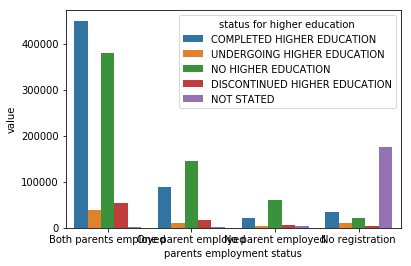

In [64]:
sns.barplot(x=df['parents employment status'], y=df['value'], hue=df['status for higher education'])

* What do we like/dislike?
  * Ugly?
  * Bad?
  * Wrong?
* [The Principle of Propotional Ink](https://callingbullshit.org/tools/tools_proportional_ink.html)
* Entering an iterative process

[Text(0, 0, 'Both parents employed'),
 Text(0, 0, 'One parent employed'),
 Text(0, 0, 'No parent employed'),
 Text(0, 0, 'No registration')]

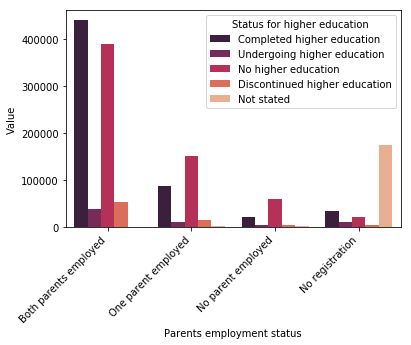

In [16]:
# 1. Change DataFrame
df.columns = df.columns.str.capitalize()
df['Status for higher education'] = df['Status for higher education'].str.capitalize()
# 1. Plot
bar = sns.barplot(x='Parents employment status', y='Value', hue='Status for higher education',
           data=df, palette="rocket")
# Keep labels but rotate
bar.set_xticklabels(bar.get_xticklabels(), rotation=45, horizontalalignment='right')

In [17]:
# Saving
file = 'col_upper_case_status_for_higher_education_2018'
bar.get_figure().savefig('{}.jpg'.format(file))
bar.get_figure().savefig('{}.pdf'.format(file))
bar.get_figure().savefig('{}.png'.format(file))

# Visualization and preprocessing of survey data
* XML to Pandas DataFrames
* Plot with seaborn

In [18]:
from urllib.request import urlopen
import xml.etree.cElementTree as et

In [19]:
url = 'https://www.b.dk/upload/webred/bmsandbox/opinion_poll/2019/pollofpolls.xml'
xml_data = urlopen(url).read()
root = et.fromstring(xml_data)

## Wide vs. long format
- Wide: one row with several observations
- Long : one row = one observation
- [Tidy data](https://www.jstatsoft.org/index.php/jss/article/view/v059i10/v59i10.pdf)
  * Each variable must have its own column.
  * Each observation must have its own row.
  * Each value must have its own cell.

In [20]:
df = pd.DataFrame(columns=['datetime', 'party', 'percent'])
for child in root.iter('poll'):
    dt = pd.to_datetime(child.find('datetime').text)
    entries = child.find('entries')
    for entry in entries:
        d = dict()
        d['datetime'] = dt
        d['party'] = entry.find('party').find('letter').text
        d['percent'] = float(entry.find('percent').text)
        df = df.append(d, ignore_index=True)
df['party'] = df['party'].astype('category')

In [21]:
df

,datetime,party,percent
0,2019-12-15,A,26.6
1,2019-12-15,Ø,8.0
2,2019-12-15,Å,2.3
3,2019-12-15,B,8.4
4,2019-12-15,C,7.5
5,2019-12-15,D,2.2
6,2019-12-15,E,0.5
7,2019-12-15,F,7.9
8,2019-12-15,I,2.1
9,2019-12-15,K,0.6


/home/tlj/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0, 0.5, 'Percentage [%]')

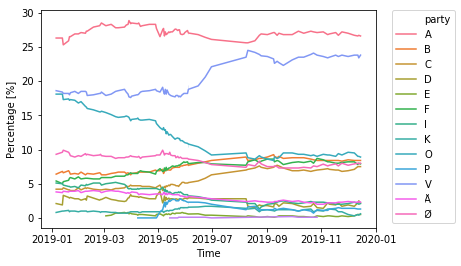

In [22]:
p = sns.lineplot(data=df, x='datetime', y='percent', hue='party')
p.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
p.set_xlabel('Time')
p.set_ylabel('Percentage [%]')

## References
[Fundamentals of Data Visualization, Wilke](https://serialmentor.com/dataviz/)

Edward R. Tufte, The Visual Display of Quantitive Information, Graphics Press, 1983

[The Principle of Propotional Ink, Carl Bergstrom and Jevin West](https://callingbullshit.org/tools/tools_proportional_ink.html)